Key Performance Indicators:
Average Monthly Revenue: 1490.92
Average Customer Lifetime Value: 536.76
Average Conversion Rate: 0.17
Average Order Fulfillment Time: 6.43
Average Data-Driven Culture Index: 2.98


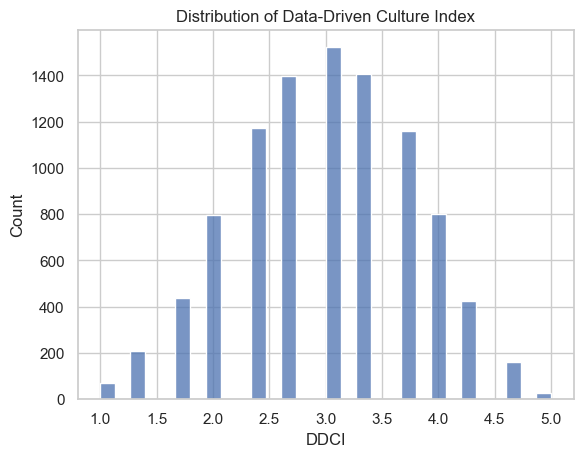


Predictive Model Performance:
MAE: 165.44593323121026
R2: 0.8581576291816493
Mean R2 (Cross-Validation): 0.860225392594443


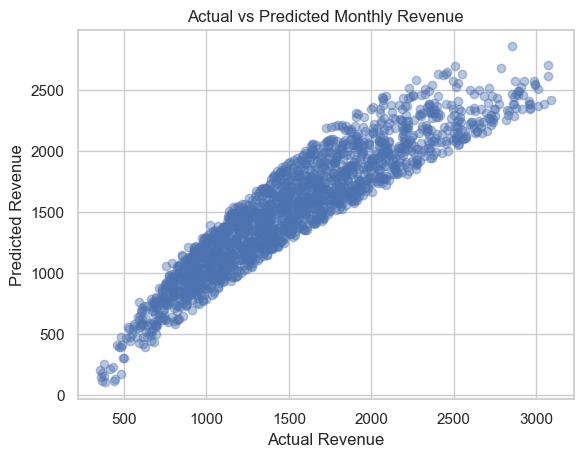

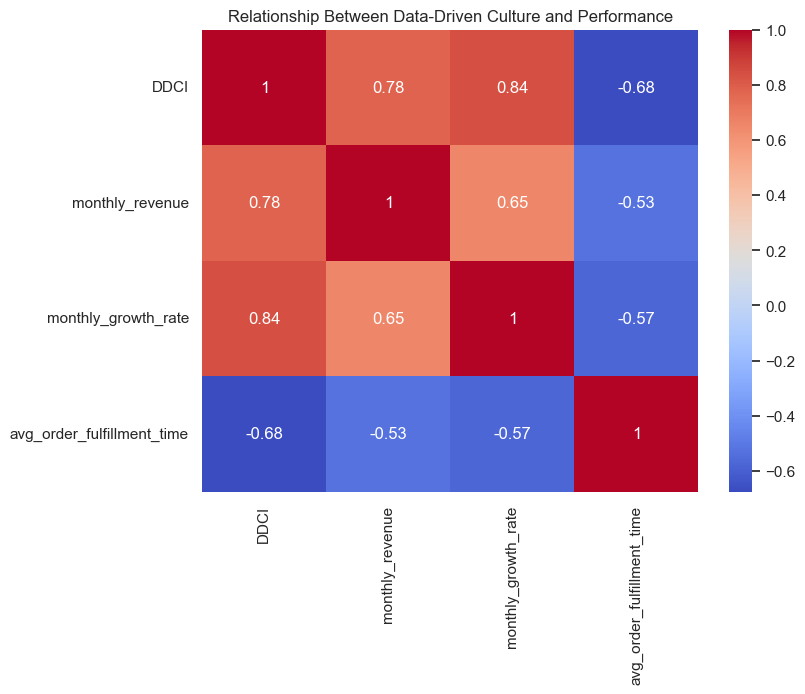

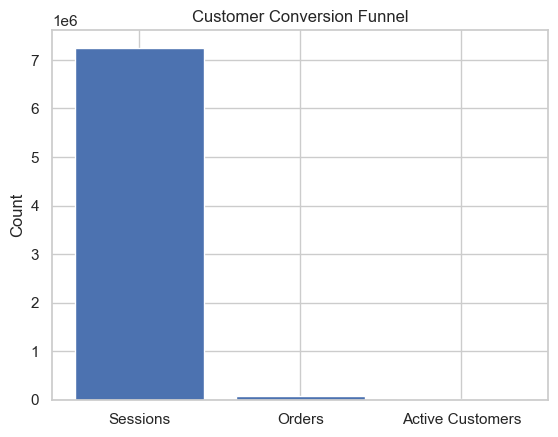

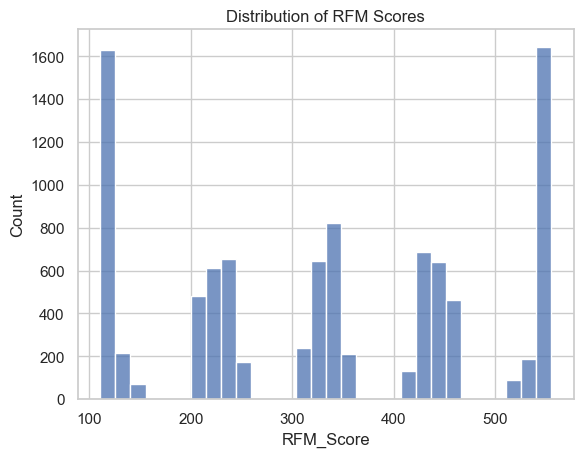

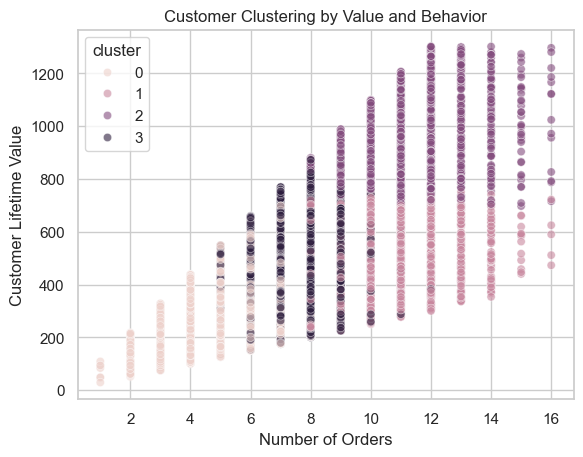

In [9]:
# ==========================================================
# Phase 2 – Empirical Case Study
# Impact of Data-Driven Culture on Startup Performance
# ==========================================================
# فاز دوم مطالعه تجربی
# بررسی تأثیر فرهنگ داده‌محور بر عملکرد استارتاپ
# ==========================================================


# -------------------------
# Imports
# -------------------------
# کتابخانه‌های موردنیاز برای تحلیل داده، رسم نمودار و مدل‌سازی
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, r2_score

# تنظیم استایل نمودارها
sns.set(style="whitegrid")


# ----------------------------------------------------------
# 4.1 Simulated Data Generation (LOGICALLY CORRELATED)
# ----------------------------------------------------------
# تولید داده‌های شبیه‌سازی‌شده با روابط منطقی بین متغیرها

# تعیین seed ثابت برای تکرارپذیری نتایج
np.random.seed(42)

# تعداد مشتریان شبیه‌سازی‌شده
n_customers = 10_000


# -------------------------
# Data-driven culture inputs
# -------------------------
# متغیرهای نمایانگر ابعاد فرهنگ داده‌محور در سازمان
df = pd.DataFrame({
    "data_usage_frequency": np.random.randint(1, 6, n_customers),      # میزان استفاده از داده
    "decision_based_on_data_score": np.random.randint(1, 6, n_customers),  # اتکا به تصمیم‌گیری داده‌محور
    "dashboard_usage_score": np.random.randint(1, 6, n_customers),     # استفاده از داشبوردهای تحلیلی
})


# -------------------------
# Data-Driven Culture Index (DDCI)
# -------------------------
# محاسبه شاخص فرهنگ داده‌محور به‌عنوان میانگین سه بعد اصلی
df["DDCI"] = (
    df["data_usage_frequency"] +
    df["decision_based_on_data_score"] +
    df["dashboard_usage_score"]
) / 3


# -------------------------
# Behavioral variables (influenced by DDCI)
# -------------------------
# متغیرهای رفتاری مشتری که تحت تأثیر سطح فرهنگ داده‌محور قرار دارند

# تعداد سشن‌های ماهانه کاربران
df["monthly_app_sessions"] = (
    np.random.normal(400, 120, n_customers) +
    df["DDCI"] * 120
).clip(50, 1500)

# نرخ تبدیل کاربران به خریدار
df["conversion_rate"] = (
    0.05 +
    df["DDCI"] * 0.04 +
    np.random.normal(0, 0.02, n_customers)
).clip(0.02, 0.4)

# تعداد سفارش‌ها
df["orders_count"] = (
    df["monthly_app_sessions"] * df["conversion_rate"] / 20 +
    np.random.poisson(2, n_customers)
).astype(int).clip(1)

# تعداد روزهای گذشته از آخرین خرید
df["days_since_last_order"] = (
    120 -
    df["orders_count"] * 4 +
    np.random.normal(0, 10, n_customers)
).clip(1, 120)


# -------------------------
# Performance metrics
# -------------------------
# شاخص‌های عملکردی و عملیاتی

# میانگین زمان انجام سفارش
df["avg_order_fulfillment_time"] = (
    10 -
    df["DDCI"] * 1.2 +
    np.random.normal(0, 1, n_customers)
).clip(1, 14)

# نرخ رشد ماهانه
df["monthly_growth_rate"] = (
    -0.02 +
    df["DDCI"] * 0.06 +
    np.random.normal(0, 0.03, n_customers)
).clip(-0.1, 0.4)


# -------------------------
# Financial metrics
# -------------------------
# شاخص‌های مالی

# درآمد ماهانه
df["monthly_revenue"] = (
    df["monthly_app_sessions"] *
    df["conversion_rate"] *
    np.random.uniform(9, 14, n_customers)
)

# ارزش طول عمر مشتری
df["customer_lifetime_value"] = (
    df["orders_count"] *
    np.random.uniform(25, 110, n_customers)
)


# ----------------------------------------------------------
# Data Cleaning
# ----------------------------------------------------------
# حذف مقادیر گمشده (در صورت وجود)
df.dropna(inplace=True)


# ----------------------------------------------------------
# Outlier Removal (IQR – numeric columns only)
# ----------------------------------------------------------
# حذف داده‌های پرت با استفاده از روش IQR
numeric_df = df.select_dtypes(include=[np.number])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

df = df[~(
    (numeric_df < (Q1 - 1.5 * IQR)) |
    (numeric_df > (Q3 + 1.5 * IQR))
).any(axis=1)]


# ----------------------------------------------------------
# 4.2 Descriptive Analytics & KPIs
# ----------------------------------------------------------
# محاسبه شاخص‌های کلیدی عملکرد (KPIs)
kpis = {
    "Average Monthly Revenue": df["monthly_revenue"].mean(),
    "Average Customer Lifetime Value": df["customer_lifetime_value"].mean(),
    "Average Conversion Rate": df["conversion_rate"].mean(),
    "Average Order Fulfillment Time": df["avg_order_fulfillment_time"].mean(),
    "Average Data-Driven Culture Index": df["DDCI"].mean()
}

print("Key Performance Indicators:")
for k, v in kpis.items():
    print(f"{k}: {v:.2f}")

# نمودار توزیع شاخص فرهنگ داده‌محور
plt.figure()
sns.histplot(df["DDCI"], bins=30)
plt.title("Distribution of Data-Driven Culture Index")
plt.xlabel("DDCI")
plt.show()


# ----------------------------------------------------------
# 4.3 Predictive Analytics
# ----------------------------------------------------------
# تحلیل پیش‌بینی درآمد ماهانه با استفاده از رگرسیون خطی

X = df[["DDCI", "monthly_app_sessions", "conversion_rate"]]
y = df["monthly_revenue"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nPredictive Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

cv_scores = cross_val_score(model, X, y, cv=5, scoring="r2")
print("Mean R2 (Cross-Validation):", cv_scores.mean())

# نمودار مقایسه مقادیر واقعی و پیش‌بینی‌شده درآمد
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Monthly Revenue")
plt.show()


# ----------------------------------------------------------
# 4.4 Correlation Analysis
# ----------------------------------------------------------
# تحلیل همبستگی بین فرهنگ داده‌محور و شاخص‌های عملکرد

corr_vars = [
    "DDCI",
    "monthly_revenue",
    "monthly_growth_rate",
    "avg_order_fulfillment_time"
]

plt.figure(figsize=(8, 6))
sns.heatmap(df[corr_vars].corr(), annot=True, cmap="coolwarm")
plt.title("Relationship Between Data-Driven Culture and Performance")
plt.show()


# ----------------------------------------------------------
# 4.5 Conversion Funnel Analysis
# ----------------------------------------------------------
# تحلیل قیف تبدیل مشتری

funnel_values = [
    df["monthly_app_sessions"].sum(),
    df["orders_count"].sum(),
    df[df["orders_count"] > 5].shape[0]
]

plt.figure()
plt.bar(["Sessions", "Orders", "Active Customers"], funnel_values)
plt.ylabel("Count")
plt.title("Customer Conversion Funnel")
plt.show()


# ----------------------------------------------------------
# 4.7 RFM Segmentation
# ----------------------------------------------------------
# بخش‌بندی مشتریان بر اساس مدل RFM

df["R"] = pd.qcut(df["days_since_last_order"], 5, labels=[5, 4, 3, 2, 1])
df["F"] = pd.qcut(df["orders_count"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
df["M"] = pd.qcut(df["customer_lifetime_value"], 5, labels=[1, 2, 3, 4, 5])

df["RFM_Score"] = (
    df["R"].astype(int) * 100 +
    df["F"].astype(int) * 10 +
    df["M"].astype(int)
)

plt.figure()
sns.histplot(df["RFM_Score"], bins=30)
plt.title("Distribution of RFM Scores")
plt.show()


# ----------------------------------------------------------
# 4.8 Customer Clustering
# ----------------------------------------------------------
# خوشه‌بندی مشتریان با الگوریتم KMeans

features = df[[
    "customer_lifetime_value",
    "orders_count",
    "monthly_app_sessions"
]]

scaled_features = StandardScaler().fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(scaled_features)

plt.figure()
sns.scatterplot(
    x=df["orders_count"],
    y=df["customer_lifetime_value"],
    hue=df["cluster"],
    alpha=0.6
)
plt.xlabel("Number of Orders")
plt.ylabel("Customer Lifetime Value")
plt.title("Customer Clustering by Value and Behavior")
plt.show()
